# Machine Learning Basics - Set 1:
## Simple and Linear Classification
Dataset A: A linearly separable dataset with two features and points belonging either to class 0 or 1.

1. Data Visualization:  
a) Plot the given 2D dataset, distinguishing between signal and background classes.  
b) Describe any patterns or separations you observe in the data.  


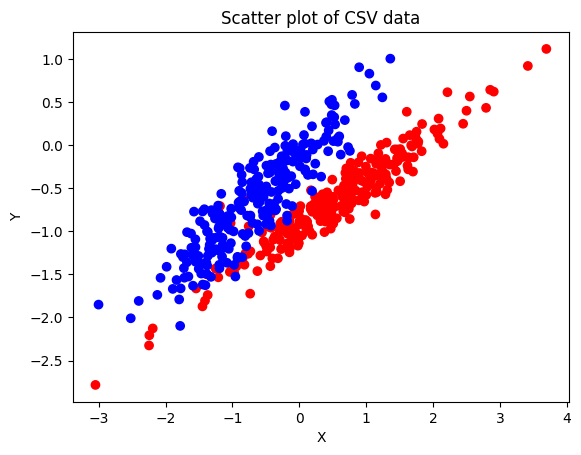

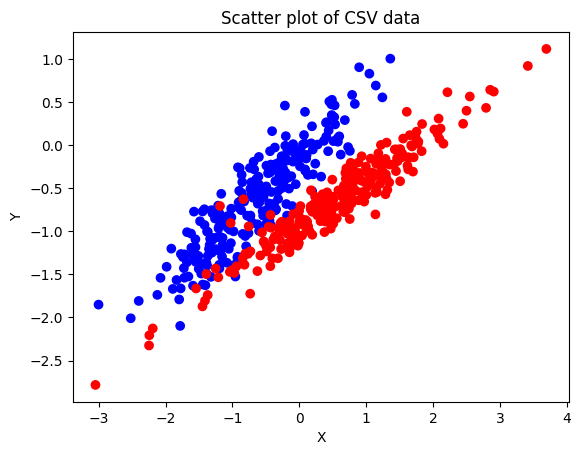

In [2]:
# 1. a)
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv('dataA.csv', header=None)


def plot_data(color = data[2]):
    plt.scatter(data[0], data[1], c=color, cmap='bwr')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot of CSV data')
    plt.show()

# First sort by the third column descending 
data = data.sort_values(by=2, ascending=False)
plot_data()

data = data.sort_values(by=2, ascending=True)
plot_data()


b) The two classes appear to have a linear correlation between x and y values, with a different coefficient.  
Similar covarience, maybe a bit more for blue; but more prominent outliers for red.


**Note**: Red is signal

2. Simple Cut-based Classification:  
a) Propose a classification rule of the form y < ycut. Justify your choice of ycut.  
b) Implement your rule and classify each data point.  
c) Calculate and report the signal efficiency and background rejection efficiency.  


a) We propose cutting at Y=-2.15, because we have a 100% true positive in the bottom region  
b) If blue point matches our guess, stay blue, if wrong make it cyan; if red point matches our guess keep color, else make it purple

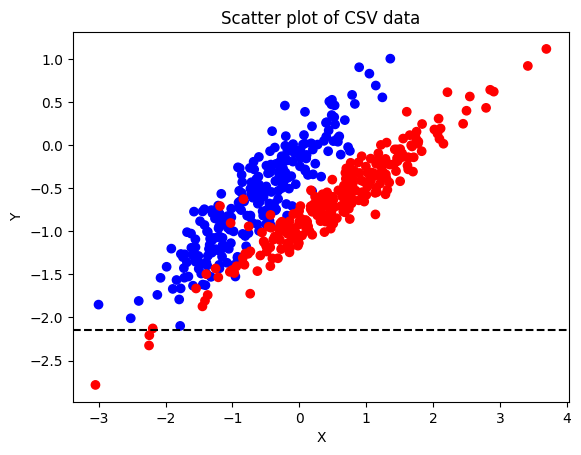

TypeError: plot_data() got an unexpected keyword argument 'color'

In [11]:
yCut = -2.15
# Show horizontal line at y=Ycut 
plt.axhline(y=yCut, color='black', linestyle='--')
plot_data()

# Define a function to check the condition for each row
def classify(row):
    return 1 if row[1] < yCut else 0

# Apply the function to each row in the dataframe
data['bad_classifier'] = data.apply(classify, axis=1)


def color_node(y, classifier):
    # If i correctly placed red below the line or blue above the line keep original color 
    # If guess is wrong, then red becomes purple and blue becomes cyan 
    # retVal : Str; color of the point
    if y == classifier:
        return 'red' if y == 1 else 'blue'
    else:
        return 'purple' if y == 1 else 'cyan'
    
data['new_color'] = data.apply(lambda row: color_node(row[1], row['bad_classifier']), axis=1)
plot_data(color=data['new_color'])


3. Linear Classification:  
a) Propose a linear classification boundary y = kx + l. Explain how you determined k and l.  
b) Implement your linear classifier and classify each data point.  
c) Calculate and report the signal efficiency and background rejection efficiency.  
d) Compare the performance of this linear classifier to the simple cut-based method. Discuss advantages
and limitations of each approach.  

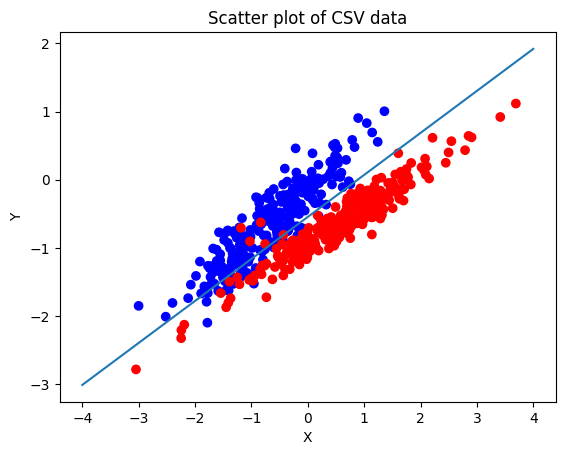

(0.6162357610061096, -0.5456142220808352)

In [19]:
# Determine linear fit of red points and the blue points; third column =1 is red, third column =0 is blue
red_points = data[data[2] == 1]
blue_points = data[data[2] == 0]

import numpy as np
# Linear fit these two 
red_fit = np.polyfit(red_points[0], red_points[1], 1)
blue_fit = np.polyfit(blue_points[0], blue_points[1], 1)

# First one is lin. coef; second one is intercept
better_classifier_slope = ( red_fit[0] + blue_fit[0])/2
intersect = (red_fit[1] + blue_fit[1])/2

# Print a line with better_classifier_coef as coef 
def plot_line(slope, intercept, x_range=(-4, 4)):
    x = np.linspace(x_range[0], x_range[1], 100)
    plt.plot(x, slope * x + intercept)
    #plt.show()

plot_line(better_classifier_slope, intersect)
plot_data()
better_classifier_slope, intersect